In [18]:
import pandas as pd
import numpy as np


In [2]:
# Cell A: Install optional packages and upload dataset file
# (You will download the standard Pima dataset manually from Kaggle,
#  or use the automatic download steps commented below.)

!pip install -q seaborn       # quiet install of seaborn (optional plotting lib)

from google.colab import files
print("Please upload the Pima CSV file (diabetes.csv) now using the file picker.")
uploaded = files.upload()     # opens a file picker so you can upload diabetes.csv
# After upload, the file will be available in Colab's working folder.


Please upload the Pima CSV file (diabetes.csv) now using the file picker.


Saving diabetes.csv to diabetes.csv


In [16]:
# Load CSV into a DataFrame called df
df = pd.read_csv("diabetes.csv")

# Check first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("Rows, Columns:", df.shape)
print("Columns:", df.columns.tolist())


Rows, Columns: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [3]:
# Cell B: load libraries (these are tools we will use)
import pandas as pd              # pandas: table manipulation (dataframes)
import numpy as np               # numpy: numeric operations
import matplotlib.pyplot as plt  # matplotlib: plotting library
import seaborn as sns            # seaborn: nicer plots
sns.set(style="whitegrid")       # nicer default plot style

# Machine Learning tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('diabetes.csv')  # change filename if different
print("Rows, Columns:", df.shape)
df.head(8)                        # show first 8 rows so you see the data


Rows, Columns: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [ ]:
np.random.seed(42)  # keeps the random numbers consistent

n = df.shape[0]  # number of rows in your dataset

# New lifestyle columns
df['sleep_hours'] = np.round(np.random.normal(7, 1.2, n), 1)          # average 7 hours, small variation
df['stress_level'] = np.random.randint(1, 11, n)                       # 1


In [4]:
# Cell C: create original lifestyle columns (synthetic but realistic)
# We'll use a fixed random seed so the synthetic data is reproducible.

np.random.seed(42)  # makes random numbers repeatable for others

n = df.shape[0]     # number of rows (patients)
# Create new columns with realistic ranges and simple rules
df['sleep_hours'] = np.round(np.random.normal(loc=7, scale=1.2, size=n), 1)
df['stress_level'] = np.random.randint(1, 11, size=n)  # 1 (low) to 10 (high)
df['physical_activity_mins'] = np.random.randint(0, 121, size=n)  # minutes per day 0-120
df['food_processed'] = np.random.choice([0,1], size=n, p=[0.6,0.4])  # 1 = eats processed food often
df['water_liters'] = np.round(np.random.normal(loc=2.5, scale=0.8, size=n),1)
df['family_history'] = np.random.choice([0,1], size=n, p=[0.5,0.5])  # 1 = positive family history

# Make sure no unrealistic values (clip)
df['sleep_hours'] = df['sleep_hours'].clip(3, 12)
df['water_liters'] = df['water_liters'].clip(0.3, 6.0)

df[['sleep_hours','stress_level','physical_activity_mins','food_processed','water_liters','family_history']].head()


,sleep_hours,stress_level,physical_activity_mins,food_processed,water_liters,family_history
0,7.6,8,7,0,2.9,0
1,6.8,10,101,0,2.8,0
2,7.8,9,71,1,2.5,1
3,8.8,7,49,0,2.8,0
4,6.7,3,66,1,2.2,1


Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'sleep_hours', 'stress_level', 'physical_activity_mins', 'food_processed', 'water_liters', 'family_history']

Outcome distribution (0 = no diabetes, 1 = diabetes):
Outcome
0    500
1    268
Name: count, dtype: int64


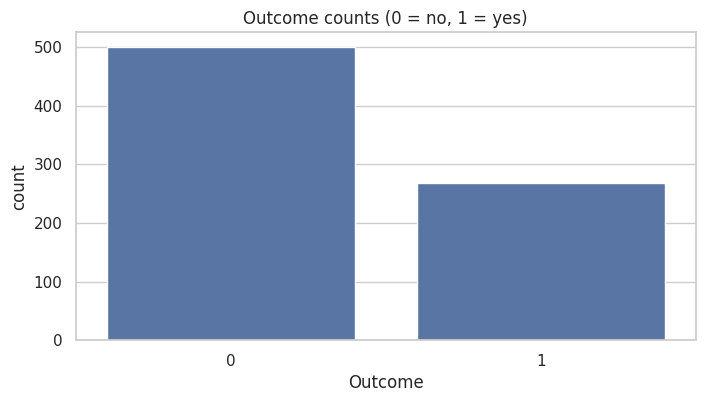

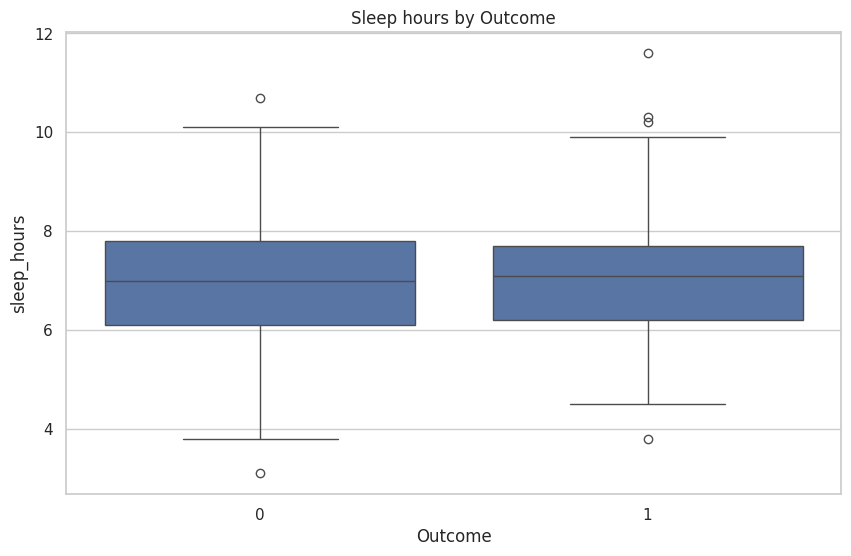

In [5]:
# Cell D: quick exploration
print("Columns:", df.columns.tolist())
print("\nOutcome distribution (0 = no diabetes, 1 = diabetes):")
print(df['Outcome'].value_counts())

# Show basic statistics for new lifestyle columns
df[['sleep_hours','stress_level','physical_activity_mins','water_liters']].describe().T

# Simple plots
plt.figure(figsize=(8,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome counts (0 = no, 1 = yes)')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='sleep_hours', data=df)
plt.title('Sleep hours by Outcome')
plt.show()


In [6]:
# Cell E: replace 0 with NaN for certain clinical features (they cannot be 0 in reality)
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_with_zero:
    df[c] = df[c].replace(0, np.nan)

# Count missing
print("Missing counts:\n", df[cols_with_zero].isnull().sum())

# Impute missing values with median (robust)
imp = SimpleImputer(strategy='median')
df[cols_with_zero] = imp.fit_transform(df[cols_with_zero])

# Confirm no more missing in those
print("After imputation, missing counts:\n", df[cols_with_zero].isnull().sum())


Missing counts:
 Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
After imputation, missing counts:
 Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [7]:
# Cell F: define features (X) and target (y)
X = df.drop('Outcome', axis=1)   # X = all columns except target
y = df['Outcome']                # y = the target column we want to predict

print("Feature columns:", X.columns.tolist())


Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'sleep_hours', 'stress_level', 'physical_activity_mins', 'food_processed', 'water_liters', 'family_history']


In [9]:
# Cell G: split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Scaling numeric features for models like LogisticRegression
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])
# We'll also keep unscaled copies for tree models:
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

# Replace numeric columns in scaled DataFrames (if needed later)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)

# For tree models we use unscaled numeric columns; for LR we use scaled arrays


In [10]:
# Cell H: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)   # max_iter increases allowed iterations
lr.fit(X_train_scaled, y_train)                            # train on scaled numeric data
y_pred_lr = lr.predict(X_test_scaled)                      # predicted labels on test set
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]           # predicted probability of class 1

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.7012987012987013
Precision: 0.5869565217391305
Recall: 0.5
F1: 0.54
ROC AUC: 0.804074074074074

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [11]:
# Cell I: Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train using unscaled features (trees don't need scaling)
rf.fit(X_train_unscaled, y_train)

y_pred_rf = rf.predict(X_test_unscaled)
y_prob_rf = rf.predict_proba(X_test_unscaled)[:,1]

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7337662337662337
Precision: 0.6511627906976745
Recall: 0.5185185185185185
F1: 0.5773195876288659
ROC AUC: 0.8143518518518518

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



Top features:
 Glucose                     0.232546
BMI                         0.116730
Age                         0.092230
DiabetesPedigreeFunction    0.088016
physical_activity_mins      0.064988
Insulin                     0.063404
Pregnancies                 0.059041
sleep_hours                 0.058275
BloodPressure               0.056061
water_liters                0.055868
dtype: float64


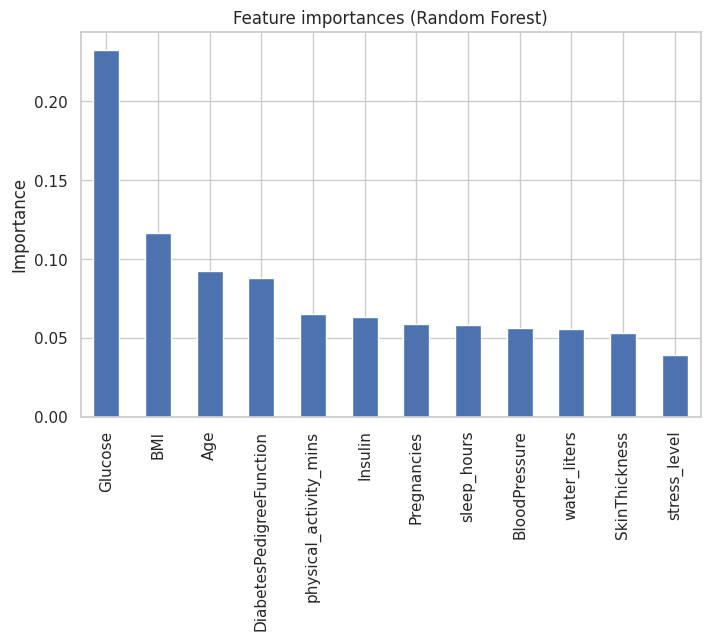

In [12]:
# Cell J: feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X_train_unscaled.columns)
importances = importances.sort_values(ascending=False)
print("Top features:\n", importances.head(10))

plt.figure(figsize=(8,5))
importances.head(12).plot(kind='bar')
plt.title('Feature importances (Random Forest)')
plt.ylabel('Importance')
plt.show()


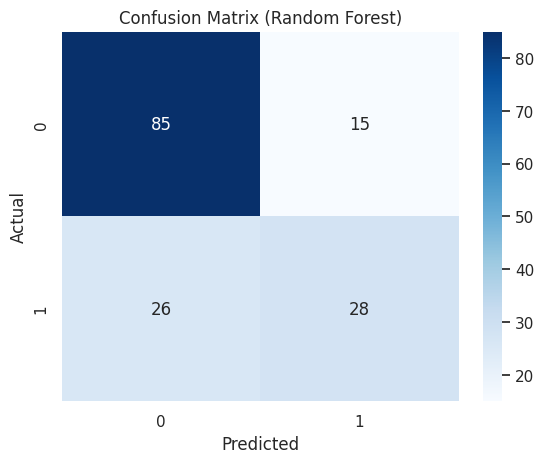

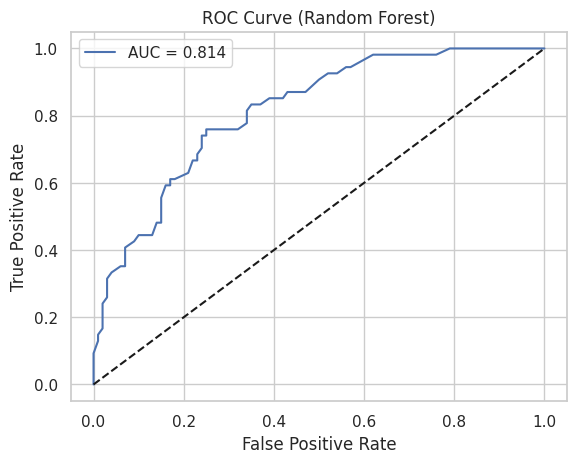

In [13]:
# Cell K: confusion matrix + ROC curve
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob_rf):.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()


In [14]:
# Cell L: save the modified dataset and model files to download
df.to_csv('lifestyle_diabetes_dataset.csv', index=False)  # your new, original dataset

import joblib
joblib.dump(rf, 'random_forest_diabetes_model.joblib')    # save model to file
joblib.dump(scaler, 'scaler.joblib')                      # save scaler too

# Download links (Colab)
from google.colab import files
files.download('lifestyle_diabetes_dataset.csv')
files.download('random_forest_diabetes_model.joblib')
files.download('scaler.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# This is not run in Colab. Save as app.py and run locally: streamlit run app.py
"""
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('random_forest_diabetes_model.joblib')
scaler = joblib.load('scaler.joblib')

st.title("Lifestyle Diabetes Risk Predictor (Demo)")
inputs = {}
for col in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    inputs[col] = st.number_input(col, value=0.0)
# Add lifestyle inputs
inputs['sleep_hours'] = st.number_input('Sleep hours', value=7.0)
inputs['stress_level'] = st.slider('Stress level', 1, 10, 5)
inputs['physical_activity_mins'] = st.number_input('Physical activity (mins)', value=30)
inputs['food_processed'] = st.selectbox('Eats processed food often?', ['No','Yes'])
inputs['water_liters'] = st.number_input('Water (liters)', value=2.5)
inputs['family_history'] = st.selectbox('Family history of diabetes?', ['No','Yes'])

# convert to numeric
inputs['food_processed'] = 1 if inputs['food_processed']=='Yes' else 0
inputs['family_history'] = 1 if inputs['family_history']=='Yes' else 0

df_in = pd.DataFrame([inputs])
# scale numeric columns same as training
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',
            'sleep_hours','stress_level','physical_activity_mins','water_liters']
df_in[num_cols] = scaler.transform(df_in[num_cols])

if st.button("Predict"):
    prob = model.predict_proba(df_in)[0,1]
    st.write(f"Predicted diabetes risk: {prob:.2f}")
"""


'\nimport streamlit as st\nimport joblib\nimport pandas as pd\n\nmodel = joblib.load(\'random_forest_diabetes_model.joblib\')\nscaler = joblib.load(\'scaler.joblib\')\n\nst.title("Lifestyle Diabetes Risk Predictor (Demo)")\ninputs = {}\nfor col in [\'Pregnancies\',\'Glucose\',\'BloodPressure\',\'SkinThickness\',\'Insulin\',\'BMI\',\'DiabetesPedigreeFunction\',\'Age\']:\n    inputs[col] = st.number_input(col, value=0.0)\n# Add lifestyle inputs\ninputs[\'sleep_hours\'] = st.number_input(\'Sleep hours\', value=7.0)\ninputs[\'stress_level\'] = st.slider(\'Stress level\', 1, 10, 5)\ninputs[\'physical_activity_mins\'] = st.number_input(\'Physical activity (mins)\', value=30)\ninputs[\'food_processed\'] = st.selectbox(\'Eats processed food often?\', [\'No\',\'Yes\'])\ninputs[\'water_liters\'] = st.number_input(\'Water (liters)\', value=2.5)\ninputs[\'family_history\'] = st.selectbox(\'Family history of diabetes?\', [\'No\',\'Yes\'])\n\n# convert to numeric\ninputs[\'food_processed\'] = 1 if i

In [21]:
np.random.seed(42)  # keeps the random numbers consistent

n = df.shape[0]  # number of rows in your dataset

# New lifestyle columns
df['sleep_hours'] = np.round(np.random.normal(7, 1.2, n), 1)          # average 7 hours, small variation
df['stress_level'] = np.random.randint(1, 11, n)                       # 1


In [23]:
# Save the new DataFrame as a CSV
df.to_csv("diabetes_modified.csv", index=False)


In [24]:
from google.colab import files
files.download("diabetes_modified.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Show first 5 rows
df.head()

# See all column names
print(df.columns.tolist())

# Check for missing values
print(df.isnull().sum())


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'sleep_hours', 'stress_level']
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
sleep_hours                 0
stress_level                0
dtype: int64


In [26]:
# Load the original CSV again (without modifications)
df = pd.read_csv("diabetes.csv")
print(df.head())         # shows first 5 rows
print(df.describe())     # summary of numeric data


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [27]:
from google.colab import files
files.download("diabetes_modified.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import pandas as pd

# Upload the original CSV again
from google.colab import files
uploaded = files


In [30]:
import pandas as pd
import numpy as np

# Make randomness reproducible
np.random.seed(42)

# Number of rows in your dataset
n = df.shape[0]

# Add lifestyle columns with realistic ranges
df['sleep_hours'] = np.round(np.random.normal(7, 1.2, n), 1)  # avg 7 hrs, sd=1.2
df['stress_level'] = np.random.randint(1, 11, n)               # 1–10 scale
df['physical_activity_mins'] = np.random.randint(0, 121, n)    # 0–120 mins/day
df['food_processed'] = np.random.choice([0,1], n, p=[0.6,0.4]) # 0=no, 1=yes
df['water_liters'] = np.round(np.random.normal(2.5, 0.8, n), 1) # avg 2.5 L/day
df['family_history'] = np.random.choice([0,1], n)              # 0=no, 1=yes

# Check the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,sleep_hours,stress_level,physical_activity_mins,food_processed,water_liters,family_history
0,6,148,72,35,0,33.6,0.627,50,1,7.6,8,7,0,2.9,1
1,1,85,66,29,0,26.6,0.351,31,0,6.8,10,101,0,2.8,0
2,8,183,64,0,0,23.3,0.672,32,1,7.8,9,71,1,2.5,0
3,1,89,66,23,94,28.1,0.167,21,0,8.8,7,49,0,2.8,1
4,0,137,40,35,168,43.1,2.288,33,1,6.7,3,66,1,2.2,0


In [33]:
# Save modified dataset
df.to_csv("pima_diabetes_lifestyle.csv", index=False)

# Download file to your computer
files.download("pima_diabetes_lifestyle.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import pandas as pd

df = pd.read_csv("pima_diabetes_lifestyle.csv")
df.head()
df.shape  # Check rows and columns
df.info()  # Check column types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   sleep_hours               768 non-null    float64
 10  stress_level              768 non-null    int64  
 11  physical_activity_mins    768 non-null    int64  
 12  food_processed            768 non-null    int64  
 13  water_liters              768 non-null    float64
 14  family_his

In [35]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
sleep_hours,0


In [36]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,sleep_hours,stress_level,physical_activity_mins,food_processed,water_liters,family_history
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,6.985417,5.509115,59.079427,0.399740,2.490885,0.519531
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,1.188437,2.927622,36.184090,0.490164,0.778070,0.499944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,3.100000,1.000000,0.000000,0.000000,-0.300000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,6.200000,3.000000,25.750000,0.000000,1.900000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,7.000000,6.000000,59.000000,0.000000,2.500000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,7.800000,8.000000,91.000000,1.000000,3.100000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,11.600000,10.000000,120.000000,1.000000,4.900000,1.000000


In [37]:
df['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


In [39]:
from sklearn.model_selection import train_test_split

# Features = all columns except Outcome
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create model
model = RandomForestClassifier(random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7402597402597403
Confusion Matrix:
 [[78 21]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [41]:
df.to_csv("pima_diabetes_final.csv", index=False)


In [42]:
import joblib
joblib.dump(model, "diabetes_model.pkl")


['diabetes_model.pkl']

In [43]:
import joblib

# Save the trained model
joblib.dump(model, "diabetes_model.pkl")


['diabetes_model.pkl']

In [44]:
# Save your enriched dataset
df.to_csv("pima_diabetes_final.csv", index=False)


In [45]:
# Save modified dataset
df.to_csv("pima_diabetes_lifestyle.csv", index=False)

# Download file to your computer
files.download("pima_diabetes_lifestyle.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>